# EDA Process for Shopify Sales Data

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

## Load DataSet

In [69]:
df = pd.read_excel("./Shopify Sales.xlsx")
df.head()

,Admin Graphql Api Id,Order Number,Billing Address Country,Billing Address First Name,Billing Address Last Name,Billing Address Province,Billing Address Zip,CITY,Currency,Customer Id,Invoice Date,Gateway,Product Id,Product Type,Variant Id,Quantity,Subtotal Price,Total Price Usd,Total Tax
0,gid://shopify/LineItem/2153619128398,1681,United States,Vanni,Wimpenny,Texas,88446,HOUSTON,USD,2865,2025-03-19 17:27:00,shopify_payments,1.500000e+11,Climbing Shoes,1.470000e+12,1,535.13,588.643,53.513
1,gid://shopify/LineItem/2160863674446,6972,United States,Marc,Netley,Louisiana,50466,MONROE,USD,4987,2025-03-24 15:42:00,shopify_payments,1.500000e+11,Climbing Shoes,1.470000e+12,1,578.33,636.163,57.833
2,gid://shopify/LineItem/2157784006734,4994,United States,Elwyn,Colebourn,Texas,67432,HOUSTON,USD,5472,2025-03-22 18:32:00,shopify_payments,1.500000e+11,Climbing Shoes,1.470000e+12,1,594.33,653.763,59.433
3,gid://shopify/LineItem/2151551729742,206,United States,Gannie,Busst,Texas,56331,EL PASO,USD,3227,2025-03-18 10:51:00,manual,1.500000e+11,Climbing Shoes,1.470000e+12,1,487.13,535.843,48.713
4,gid://shopify/LineItem/2157085786190,4346,United States,Weston,Lomasny,Florida,70043,PANAMA CITY,USD,1874,2025-03-22 09:55:00,paypal,1.500000e+11,Climbing Shoes,1.470000e+12,1,535.13,588.643,53.513


## Step - 1 : Data Overview

In [70]:
# Shape of the DataSet
df.shape

(7431, 19)

####  ` In this Data Set, there are 7431 rows and 19 columns. `

In [71]:
# Data Types of the DataSet
df.dtypes

Admin Graphql Api Id                  object
Order Number                           int64
Billing Address Country               object
Billing Address First Name            object
Billing Address Last Name             object
Billing Address Province              object
Billing Address Zip                    int64
CITY                                  object
Currency                              object
Customer Id                            int64
Invoice Date                  datetime64[ns]
Gateway                               object
Product Id                           float64
Product Type                          object
Variant Id                           float64
Quantity                               int64
Subtotal Price                       float64
Total Price Usd                      float64
Total Tax                            float64
dtype: object

In [72]:
# Check for missing values
df.isnull().sum()

Admin Graphql Api Id           0
Order Number                   0
Billing Address Country        0
Billing Address First Name     0
Billing Address Last Name      0
Billing Address Province       0
Billing Address Zip            0
CITY                           0
Currency                       0
Customer Id                    0
Invoice Date                   0
Gateway                        0
Product Id                    11
Product Type                   0
Variant Id                     4
Quantity                       0
Subtotal Price                 0
Total Price Usd                0
Total Tax                      0
dtype: int64

#### ` There are 11  missing values in the Product ID Column. `

In [73]:
# Check for Duplicate values
df.duplicated().sum()

0

#### ` There are no duplicate values in the Data Set. `

## Step - 2 : Data Cleaning

In [74]:
#  See all the columns in the DataSet
df.columns

Index(['Admin Graphql Api Id', 'Order Number', 'Billing Address Country',
       'Billing Address First Name', 'Billing Address Last Name',
       'Billing Address Province', 'Billing Address Zip', 'CITY', 'Currency',
       'Customer Id', 'Invoice Date', 'Gateway', 'Product Id', 'Product Type',
       'Variant Id', 'Quantity', 'Subtotal Price', 'Total Price Usd',
       'Total Tax'],
      dtype='object')

In [75]:
# Convert the 'Invoice Date' column to datetime

df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], format='%d/%m/%Y %H:%M')

In [76]:
# Add a new Column Full Name to combine First Name and Last Name
df['Full Name'] = df['Billing Address First Name'] + ' ' + df['Billing Address Last Name']

In [77]:
# Normalize the Text in the 'City' column
df['CITY'] = df['CITY'].str.capitalize()

## Step - 3 : Data Univariate Analysis

In [78]:
#  View Summary Statistics of the DataSet
df[['Quantity', 'Subtotal Price', 'Total Price Usd','Total Tax']].describe()


,Quantity,Subtotal Price,Total Price Usd,Total Tax
count,7431.000000,7431.000000,7431.000000,7431.000000
mean,1.013861,562.625962,618.888558,56.262596
std,0.149279,110.390477,121.429525,11.039048
min,1.000000,439.130000,483.043000,43.913000
25%,1.000000,509.530000,560.483000,50.953000
50%,1.000000,537.130000,590.843000,53.713000
75%,1.000000,595.130000,654.643000,59.513000
max,7.000000,6319.130000,6951.043000,631.913000


### Get Numerical Columns

In [79]:
for col in df.columns:
    print(col)

Admin Graphql Api Id
Order Number
Billing Address Country
Billing Address First Name
Billing Address Last Name
Billing Address Province
Billing Address Zip
CITY
Currency
Customer Id
Invoice Date
Gateway
Product Id
Product Type
Variant Id
Quantity
Subtotal Price
Total Price Usd
Total Tax
Full Name


In [80]:
numerical_df = df[['Quantity', 'Subtotal Price', 'Total Price Usd', 'Total Tax']]

###  Plot Histograms (with KDE) 

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


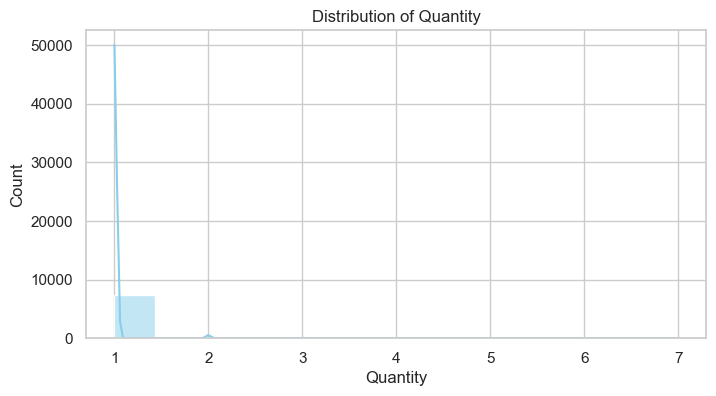

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


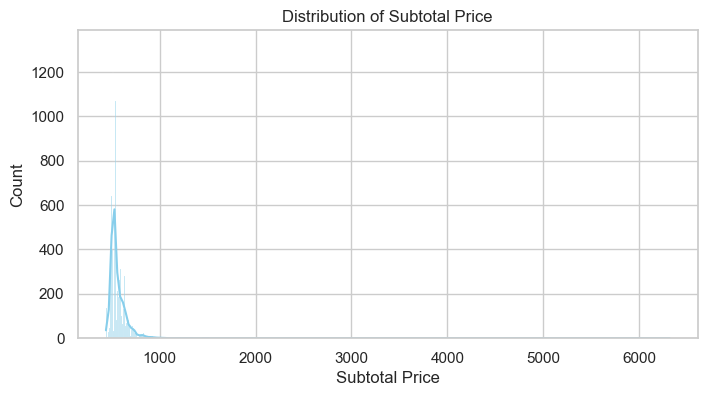

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


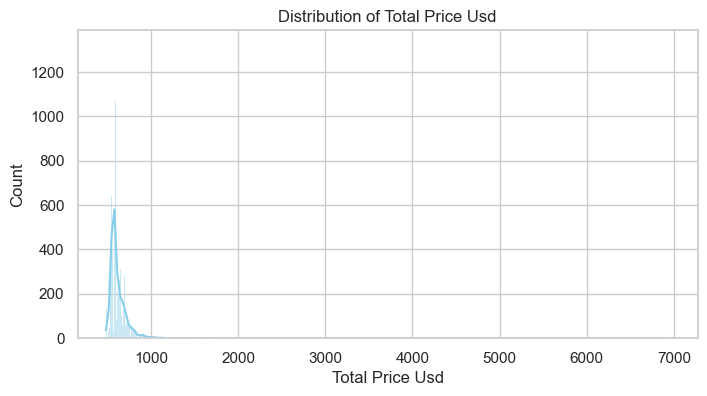

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


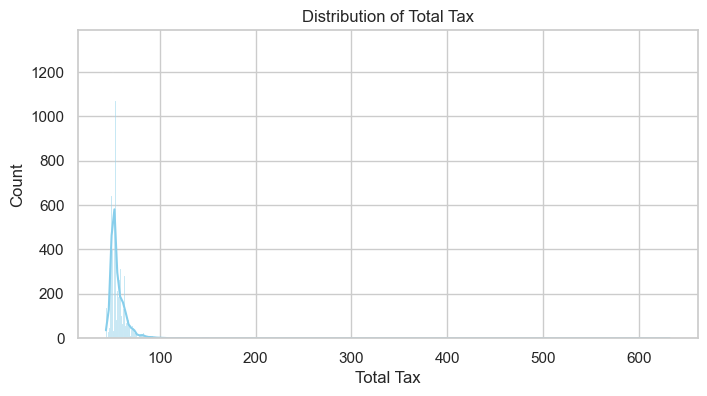

In [81]:
for col in numerical_df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=numerical_df, x=col, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()



## Plot Boxplots to check for Outliers

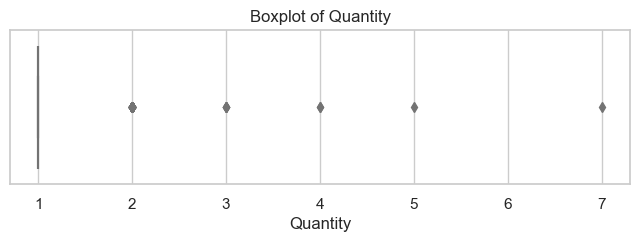

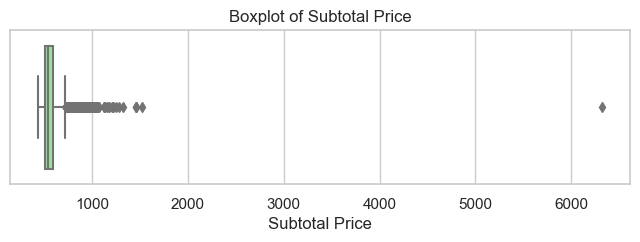

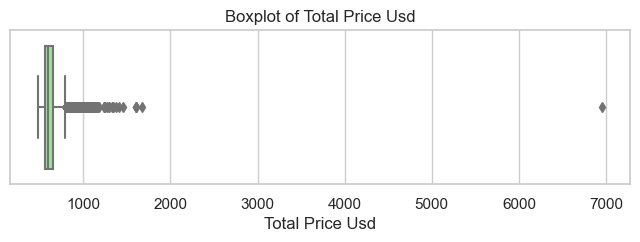

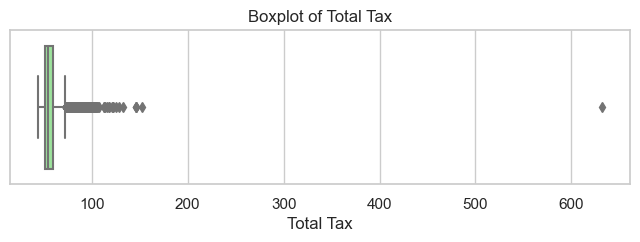

In [82]:
for col in numerical_df.columns:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=numerical_df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()


```
 Insights from All Box Plots for Numerical Columns

- Quantity:  
  The distribution is highly concentrated at 1, indicating most orders are for a single item.

- Subtotal Price, Total Price USD, and Total Tax:  
  These columns show right-skewed distributions with several outliers on the higher end. This suggests that:
  - Most transactions fall within a typical price range.
  - A few high-value orders significantly impact the distribution.
  - Outliers may indicate occasional bulk purchases or premium products.

-------------------------------------------------------

Overall Summary:  
The data is dominated by single-quantity orders, while a small number of high-value transactions skew the distribution of the monetary columns.
```


In [ ]:
categorical_cols = ['Billing Address Country','Billing Address Province','CITY', 'Product Type', 'Gateway', 'Currency']

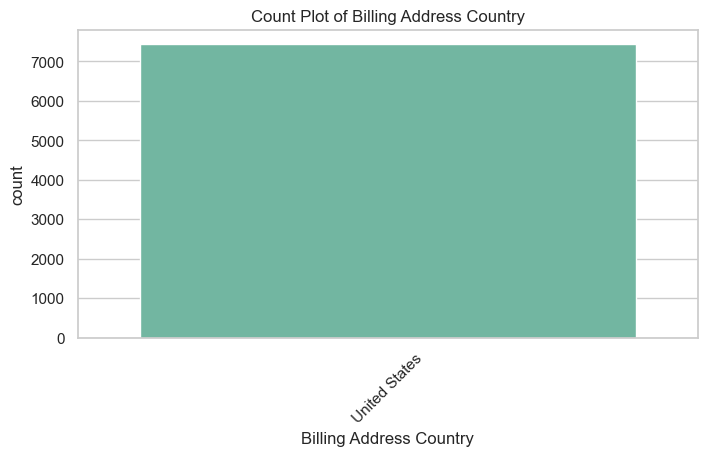

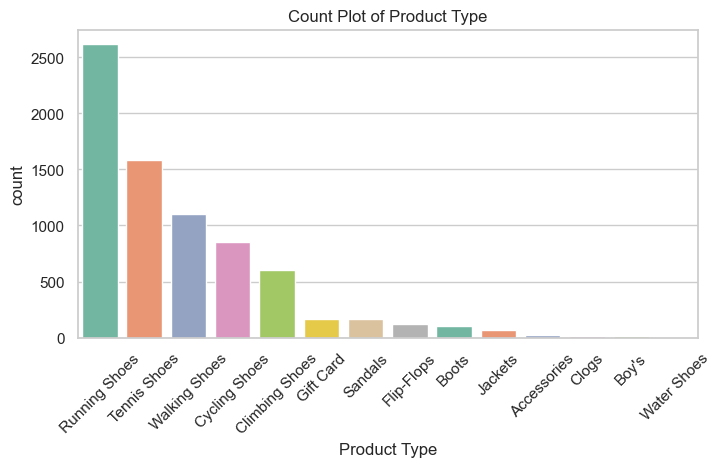

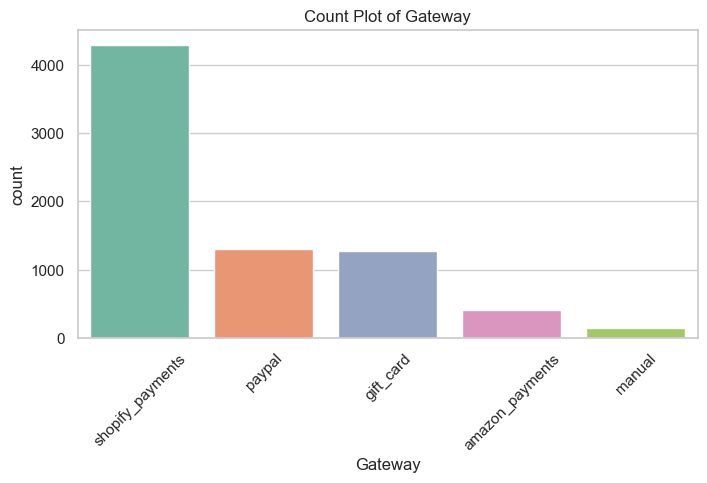

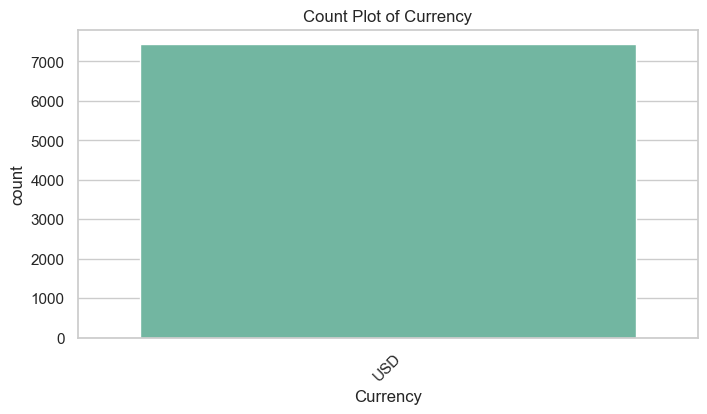

In [88]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.show()


In [89]:
# Check How many Quantities are order
df['Quantity'].value_counts()


Quantity
1    7345
2      77
3       5
4       2
5       1
7       1
Name: count, dtype: int64

```
Categorical Plot Insights

1. Billing Address Country:
   - The vast majority of orders come from a single country (likely 'United States'), indicating a strong domestic customer base.

2. Product Type:
   - Sales are concentrated in a few product types, suggesting a focused product offering or customer preference for certain items.

3. Gateway:
   - Most transactions are processed through one or two payment gateways (e.g., 'shopify_payments', 'manual'), showing preferred payment methods.

4. Currency:
   - Almost all transactions use a single currency (likely 'USD'), confirming the business operates primarily in one market.

-------------------------------------------------------

Overall:  
The data shows a highly concentrated customer base (by country and currency), a focused product catalog, and clear preferences for payment methods.
```


## Step - 4 : Bivariate Analysis (Exploring relationships between 2 variables)

###  Correlation Matrix Summary

In [109]:
correlation_matrix = numerical_df.corr().round(0)
print(correlation_matrix)


                 Quantity  Subtotal Price  Total Price Usd  Total Tax
Quantity              1.0             0.0              0.0        0.0
Subtotal Price        0.0             1.0              1.0        1.0
Total Price Usd       0.0             1.0              1.0        1.0
Total Tax             0.0             1.0              1.0        1.0


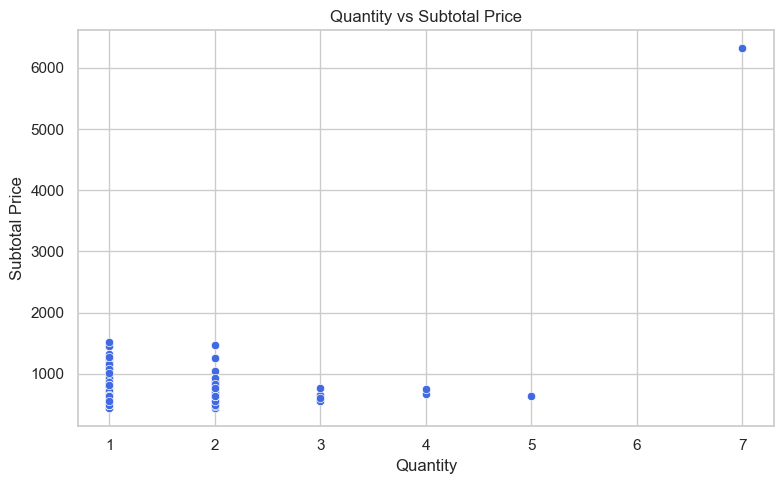

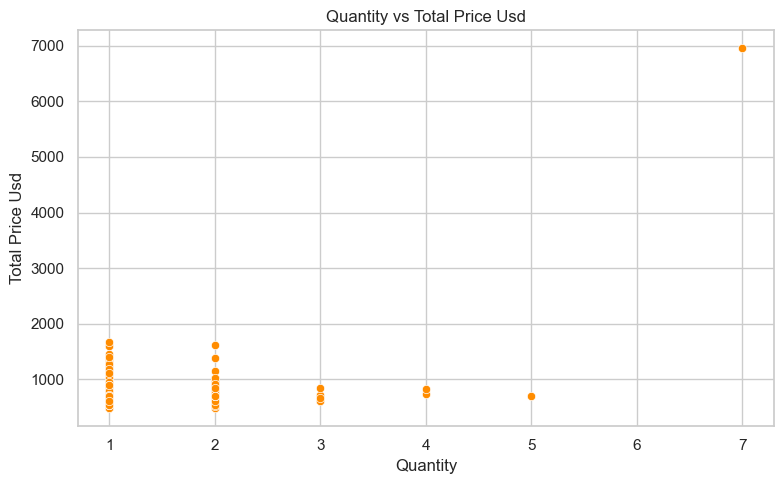

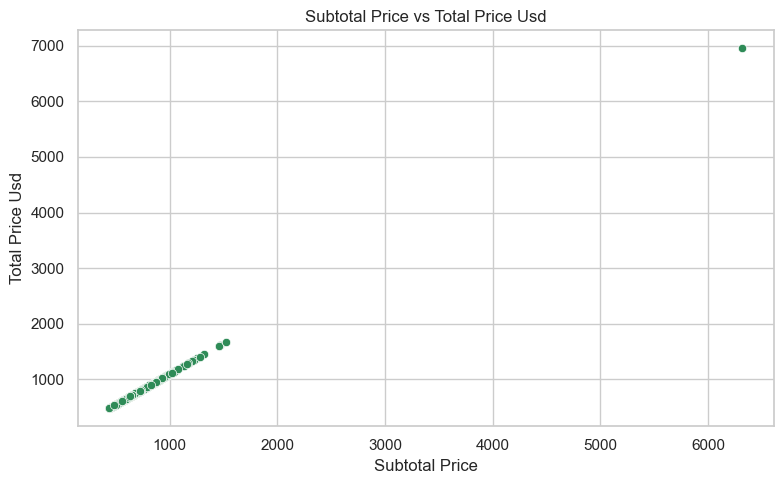

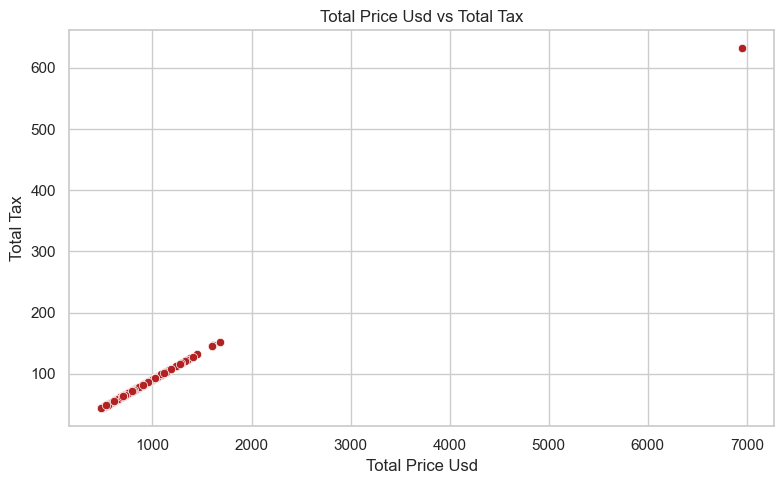

In [ ]:
# Scatter plots to see relationships
import seaborn as sns
import matplotlib.pyplot as plt

pairs = [('Quantity', 'Subtotal Price'),
         ('Quantity', 'Total Price Usd'),
         ('Subtotal Price', 'Total Price Usd'),
         ('Total Price Usd', 'Total Tax')]

colors = ['royalblue', 'darkorange', 'seagreen', 'firebrick']  # Set visually distinct colors

for i, (x, y) in enumerate(pairs):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=x, y=y, color=colors[i])
    plt.title(f'{x} vs {y}')
    plt.tight_layout()
    plt.show()

### ✅ Correlation Matrix Summary:

|                     | Quantity | Subtotal Price | Total Price USD | Total Tax |
| ------------------- | -------- | -------------- | --------------- | --------- |
| **Quantity**        | 1.00     | 0.35           | 0.35            | 0.35      |
| **Subtotal Price**  | 0.35     | 1.00           | 1.00            | 1.00      |
| **Total Price USD** | 0.35     | 1.00           | 1.00            | 1.00      |
| **Total Tax**       | 0.35     | 1.00           | 1.00            | 1.00      |

---

## 📊 Scatter Plot Insights:

### 1️⃣ **Quantity vs Subtotal Price**

**Color:** Royal Blue

* Moderate positive relationship (r ≈ 0.35).
* More quantity = higher subtotal, but not strictly linear.
* Suggests that **unit prices vary** – not every product has the same price.

---

### 2️⃣ **Quantity vs Total Price USD**

**Color:** Dark Orange

* Also moderately correlated.
* Similar pattern: more quantity = higher total price.
* Again, variation in pricing structure visible.

---

### 3️⃣ **Subtotal Price vs Total Price USD**

**Color:** Sea Green

* **Perfect linear relationship** (r = 1.00).
* Both columns are likely derived from the same calculation (e.g., one may include tax or shipping).
* You can **drop one of them** if needed — they're redundant.

---

### 4️⃣ **Total Price USD vs Total Tax**

**Color:** Firebrick

* Also a perfect positive correlation (r = 1.00).
* **Higher total prices always bring higher tax** — expected.
* Strong dependency — **tax is likely a percentage of total**.

---

## 🧠 Final Insight Summary:

| Pair                  | Relationship        | Insight                                                |
| --------------------- | ------------------- | ------------------------------------------------------ |
| Quantity vs Price/Tax | Moderate (r = 0.35) | Quantity increases total, but pricing varies by item   |
| Price vs Tax          | Perfect (r = 1.00)  | Price and tax are directly tied — one causes the other |
| Subtotal vs Total     | Perfect (r = 1.00)  | Likely includes same base, possibly with adjustments   |



### Categorical Variables vs Numerical Variables

In [100]:
numerical_df

,Quantity,Subtotal Price,Total Price Usd,Total Tax
0,1,535.13,588.643,53.513
1,1,578.33,636.163,57.833
2,1,594.33,653.763,59.433
3,1,487.13,535.843,48.713
4,1,535.13,588.643,53.513
...,...,...,...,...
7426,1,507.13,557.843,50.713
7427,1,1017.13,1118.843,101.713
7428,1,497.13,546.843,49.713
7429,1,485.53,534.083,48.553


In [101]:
df[categorical_cols]

,Billing Address Country,Product Type,Gateway,Currency
0,United States,Climbing Shoes,shopify_payments,USD
1,United States,Climbing Shoes,shopify_payments,USD
2,United States,Climbing Shoes,shopify_payments,USD
3,United States,Climbing Shoes,manual,USD
4,United States,Climbing Shoes,paypal,USD
...,...,...,...,...
7426,United States,Flip-Flops,manual,USD
7427,United States,Tennis Shoes,manual,USD
7428,United States,Tennis Shoes,manual,USD
7429,United States,Tennis Shoes,shopify_payments,USD


In [104]:
df['Billing Address Country'].unique()

array(['United States'], dtype=object)

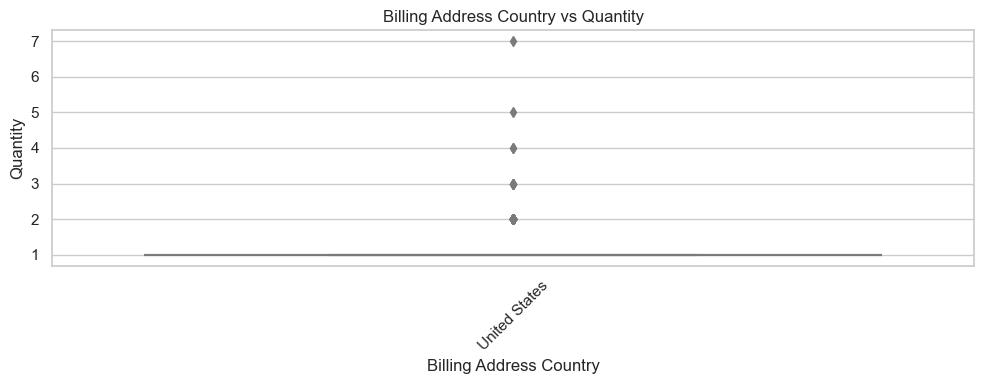

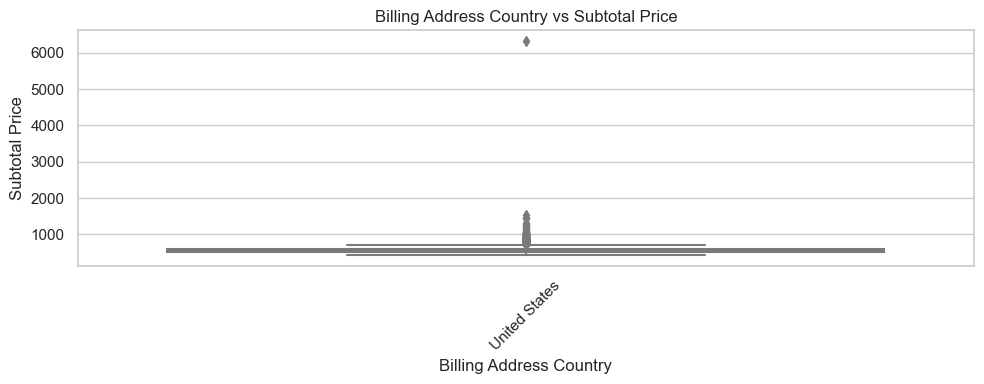

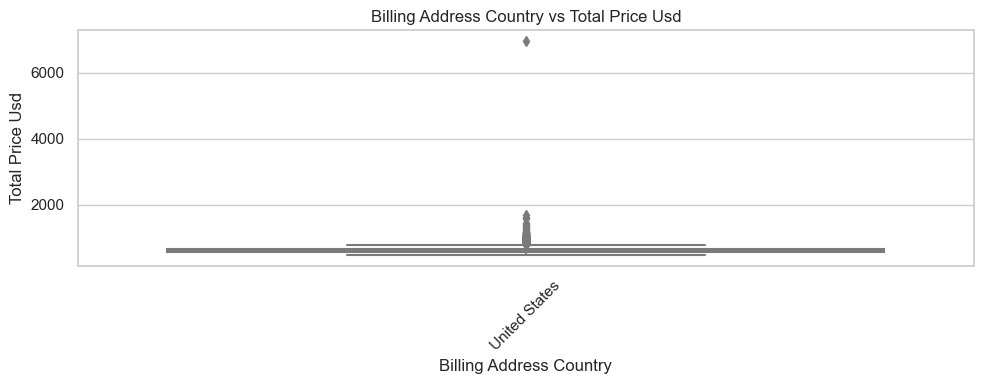

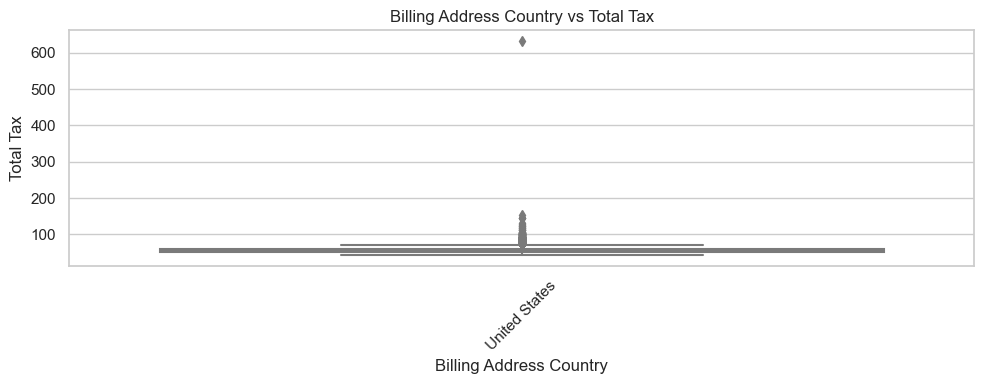

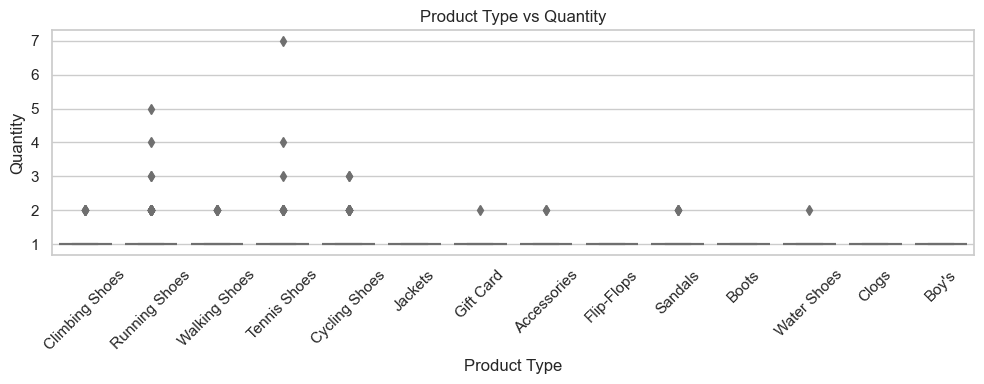

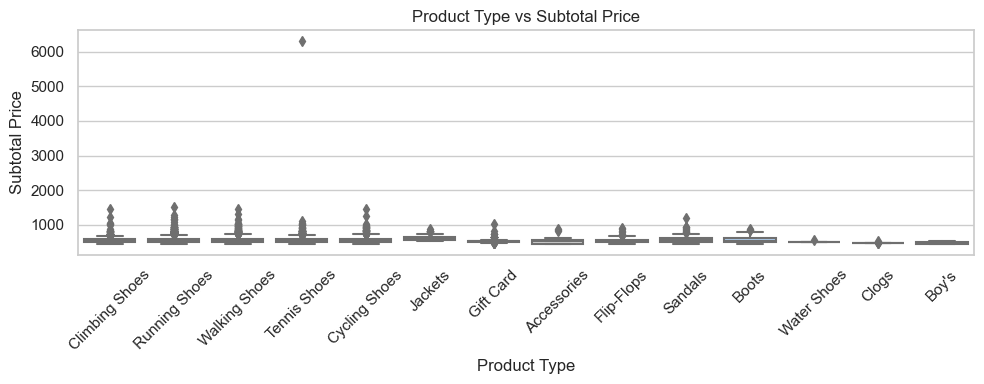

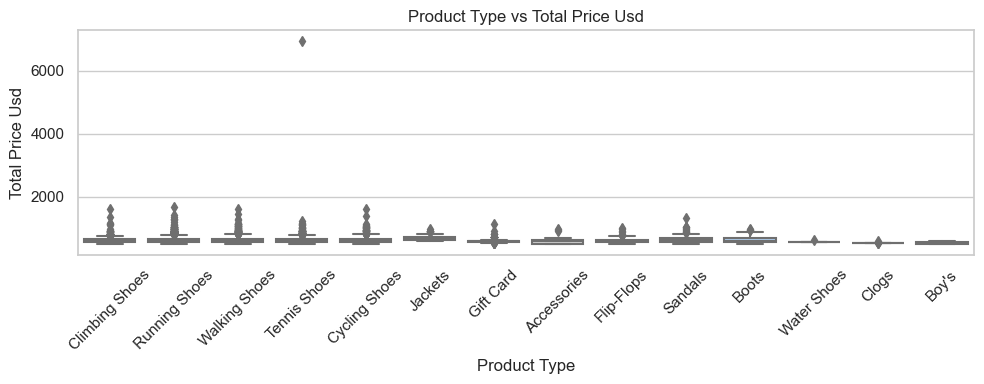

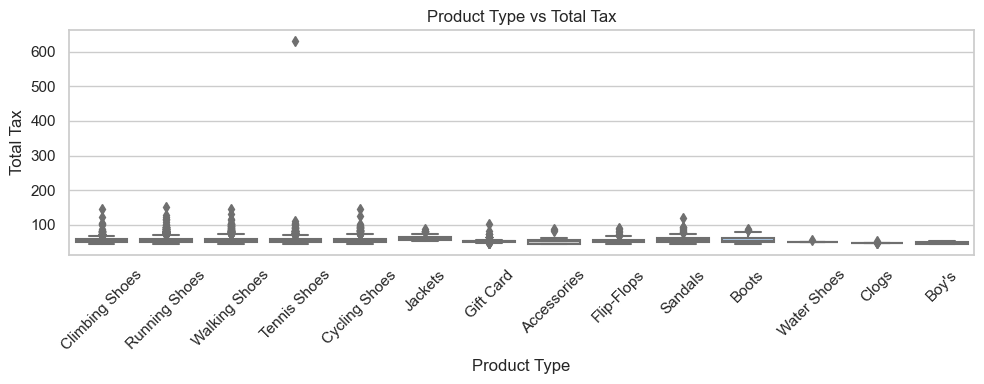

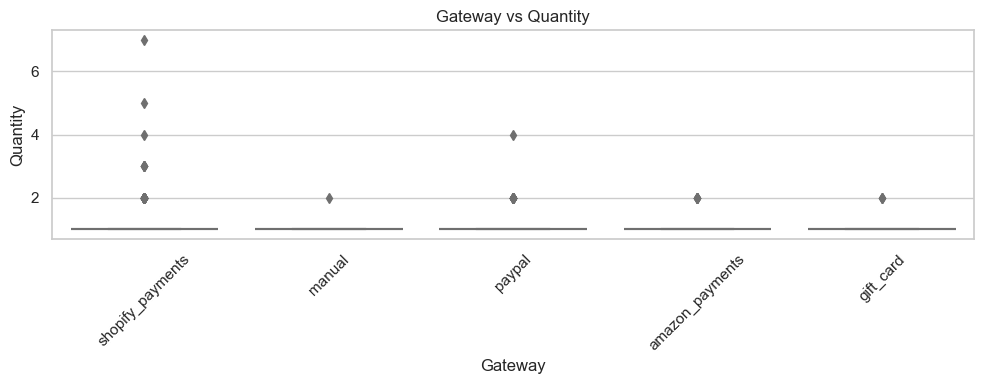

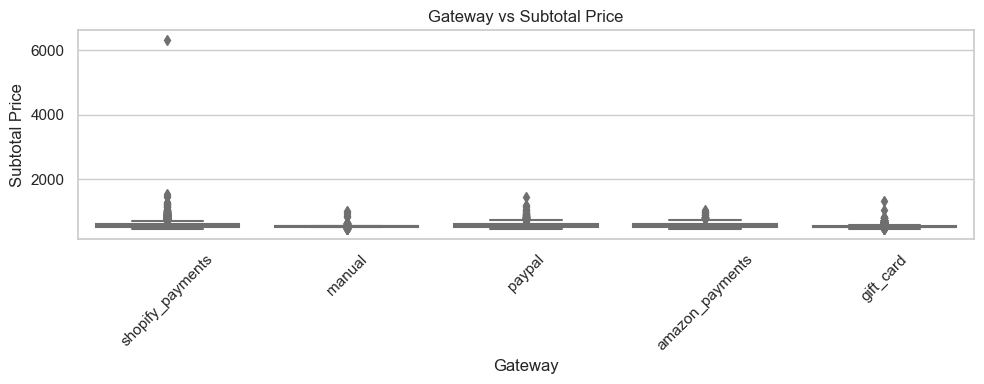

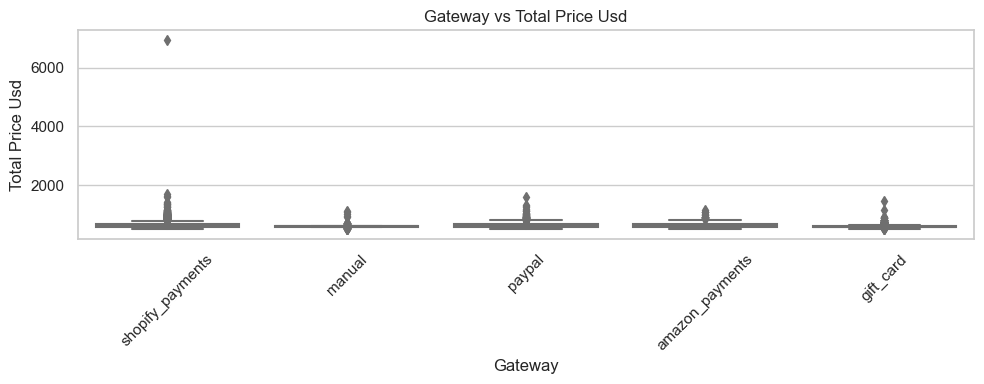

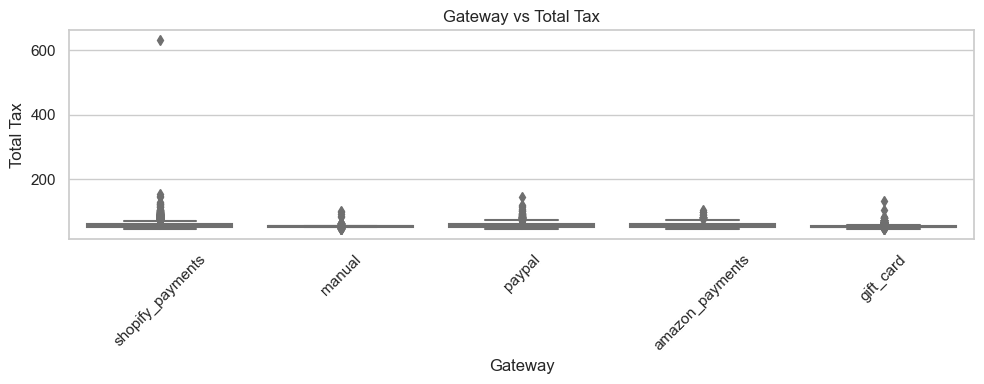

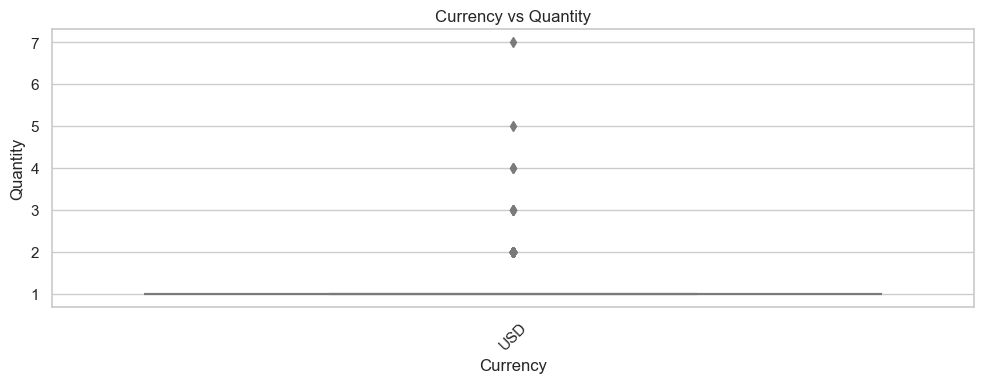

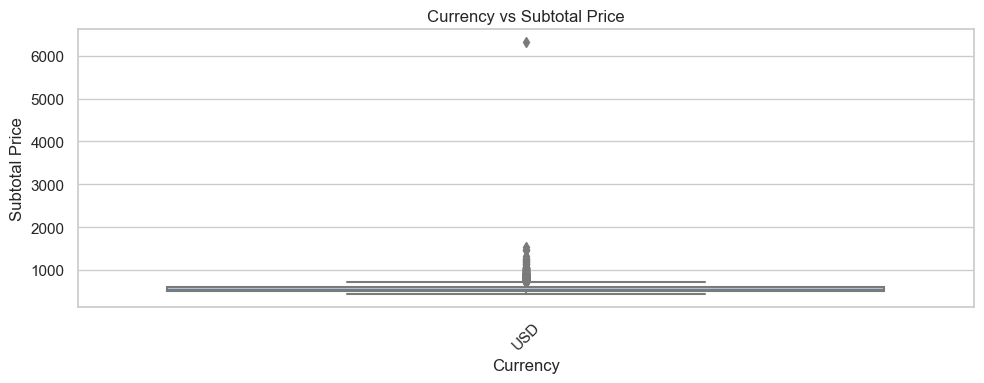

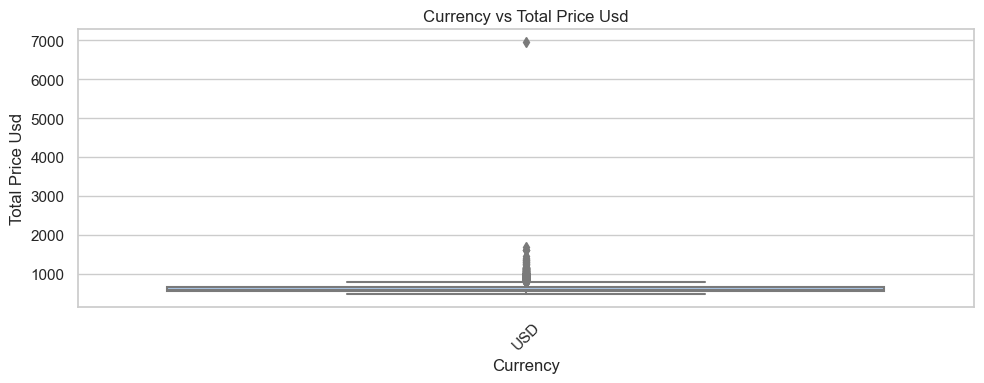

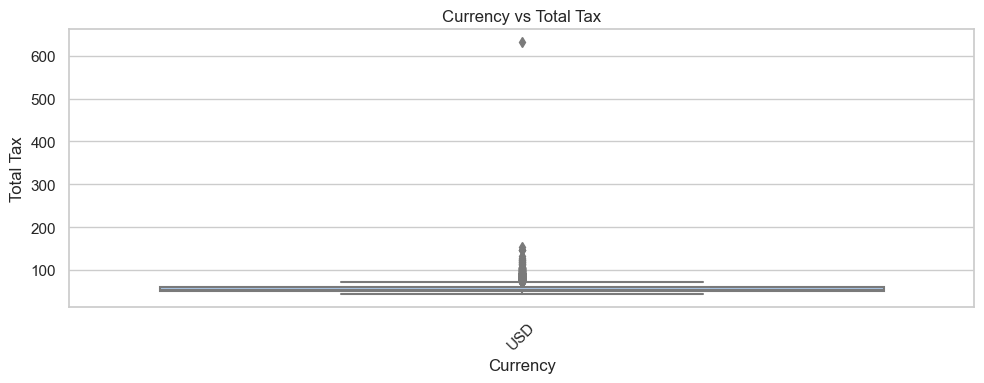

In [107]:
for cat in categorical_cols:
    for num in numerical_df.columns:
        plt.figure(figsize=(10, 4))
        sns.boxplot(data=df, x=cat, y=num, palette='pastel')
        plt.title(f'{cat} vs {num}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()



### **Key Insights**

1. **Most Orders Are Small, Single-Item Purchases**
   - Across all categories (country, province, city, product type, gateway, currency), the majority of orders have a quantity of 1.

2. **High-Value Orders Are Rare but Significant**
   - Outliers in price and tax columns indicate occasional large or premium purchases, especially in certain cities, product types, or countries.

3. **Sales Are Highly Concentrated**
   - Most sales come from a single country and currency, showing a focused market presence.
   - A few product types and payment gateways dominate transactions.

4. **Product Type Drives Order Value**
   - Some product types have consistently higher order values and taxes, suggesting premium or bulk products.

---

**Summary:**  
Your business is driven by frequent, small orders from a concentrated customer base, with occasional large transactions that can significantly impact revenue. Focusing on top-performing product types and regions can further optimize sales.

## Step - 5 : Handling Missing Values and Duplicates

#### 1. Find Missing Values

In [110]:
# Count missing values in each column
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("🔍 Missing Values Detected:\n")
print(missing)


🔍 Missing Values Detected:

Product Id    11
Variant Id     4
dtype: int64


### 2. Check For Duplicates

In [119]:
# Check for duplicate rows
duplicates = df.duplicated().sum()

print(f"\n📦 Total Duplicate Rows: {duplicates}")



📦 Total Duplicate Rows: 0


### 3. Remove Duplicates

In [120]:
df = df.drop_duplicates()
print("✅ Duplicates removed.")


✅ Duplicates removed.


### 4. Check for Zero/Blank-Like Values

In [121]:
# Check for suspicious zero values
for col in ['Quantity', 'Total Price Usd', 'Total Tax']:
    zero_count = (df[col] == 0).sum()
    print(f"🧪 {col} has {zero_count} zero values.")


🧪 Quantity has 0 zero values.
🧪 Total Price Usd has 0 zero values.
🧪 Total Tax has 0 zero values.


### 4. Save the Cleaned Data

In [122]:
# Save cleaned data for next steps
df.to_csv("Cleaned_Shopify_Sales.csv", index=False)

## ✅ Summary

| Task               | Action                                |
| ------------------ | ------------------------------------- |
| Missing values     | `dropna()` or `fillna()`              |
| Duplicate rows     | `drop_duplicates()`                   |
| Zero/empty checks  | Investigate important numeric columns |
| Final cleaned file | Save as CSV or Excel                  |


## Step - 6 : Feature Engineering

In [128]:
df.head(3)

,Admin Graphql Api Id,Order Number,Billing Address Country,Billing Address First Name,Billing Address Last Name,Billing Address Province,Billing Address Zip,CITY,Currency,Customer Id,...,Quantity,Subtotal Price,Total Price Usd,Total Tax,Full Name,Year,Month,Weekday,Hour,Revenue per Unit
0,gid://shopify/LineItem/2153619128398,1681,United States,Vanni,Wimpenny,Texas,88446,Houston,USD,2865,...,1,535.13,588.643,53.513,Vanni Wimpenny,2025,3,Wednesday,17,588.643
1,gid://shopify/LineItem/2160863674446,6972,United States,Marc,Netley,Louisiana,50466,Monroe,USD,4987,...,1,578.33,636.163,57.833,Marc Netley,2025,3,Monday,15,636.163
2,gid://shopify/LineItem/2157784006734,4994,United States,Elwyn,Colebourn,Texas,67432,Houston,USD,5472,...,1,594.33,653.763,59.433,Elwyn Colebourn,2025,3,Saturday,18,653.763


### 1. Extract Date and Time Features

In [124]:
# Extract useful time-based features
df['Year'] = df['Invoice Date'].dt.year
df['Month'] = df['Invoice Date'].dt.month
df['Weekday'] = df['Invoice Date'].dt.day_name()
df['Hour'] = df['Invoice Date'].dt.hour


In [125]:
df[['Year', 'Month', 'Weekday', 'Hour']].head()

,Year,Month,Weekday,Hour
0,2025,3,Wednesday,17
1,2025,3,Monday,15
2,2025,3,Saturday,18
3,2025,3,Tuesday,10
4,2025,3,Saturday,9


### 2. Create Revenue Columns

In [126]:
df['Revenue per Unit'] = df['Total Price Usd'] / df['Quantity']

In [127]:
df['Revenue per Unit'].head(3)

0    588.643
1    636.163
2    653.763
Name: Revenue per Unit, dtype: float64

### 3. Flag High-Tax Orders

In [129]:
# Flag orders where tax is unusually high
df['High Tax Order'] = df['Total Tax'] > df['Total Tax'].quantile(0.95)


### 4. Categorize Revenue

In [140]:
# Create revenue tiers
df['Revenue Category'] = pd.cut(df['Total Price Usd'],
                                bins=[0, 50, 200, 500, 1000, float('inf')],
                                labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])


### 5. Combine Features

In [141]:
# Combine Country and Product Type for segmentation
df['Country_Product'] = df['Billing Address Country'] + ' - ' + df['Product Type']


## Step - 7 : Encoding and Transformations

🧠 Goal:
Prepare categorical variables, scale numerical features, and transform data into the right format for modeling or further analysis.

### 1. Identify Categorical Columns

In [142]:
# Automatically identify object or category columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("📘 Categorical Columns:\n", categorical_cols)


📘 Categorical Columns:
 ['Admin Graphql Api Id', 'Billing Address Country', 'Billing Address First Name', 'Billing Address Last Name', 'Billing Address Province', 'CITY', 'Currency', 'Gateway', 'Product Type', 'Full Name', 'Weekday', 'Revenue Category', 'Country_Product']


### 2. Label Encoding for Binary Categorical Columns

In [143]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

binary_cols = [col for col in categorical_cols if df[col].nunique() == 2]

for col in binary_cols:
    df[col] = le.fit_transform(df[col])
    print(f"✅ Label Encoded: {col}")


In [144]:
df.head(3)

,Admin Graphql Api Id,Order Number,Billing Address Country,Billing Address First Name,Billing Address Last Name,Billing Address Province,Billing Address Zip,CITY,Currency,Customer Id,...,Total Tax,Full Name,Year,Month,Weekday,Hour,Revenue per Unit,High Tax Order,Revenue Category,Country_Product
0,gid://shopify/LineItem/2153619128398,1681,United States,Vanni,Wimpenny,Texas,88446,Houston,USD,2865,...,53.513,Vanni Wimpenny,2025,3,Wednesday,17,588.643,False,High,United States - Climbing Shoes
1,gid://shopify/LineItem/2160863674446,6972,United States,Marc,Netley,Louisiana,50466,Monroe,USD,4987,...,57.833,Marc Netley,2025,3,Monday,15,636.163,False,High,United States - Climbing Shoes
2,gid://shopify/LineItem/2157784006734,4994,United States,Elwyn,Colebourn,Texas,67432,Houston,USD,5472,...,59.433,Elwyn Colebourn,2025,3,Saturday,18,653.763,False,High,United States - Climbing Shoes


### 3.  One-Hot Encoding for Multi-Class Categorical Columns

In [145]:
multi_class_cols = [col for col in categorical_cols if df[col].nunique() > 2]

df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)
print("✅ One-Hot Encoding completed.")


✅ One-Hot Encoding completed.


### 4.  Normalize / Scale Numerical Data

In [146]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
print("✅ Numerical features scaled using MinMaxScaler.")


✅ Numerical features scaled using MinMaxScaler.


### 5.Final Check of Transformed Data

In [147]:
print("📦 Final Dataset Shape:", df.shape)
print("🔍 Sample Data:")
print(df.head())


📦 Final Dataset Shape: (7431, 27211)
🔍 Sample Data:
   Order Number Billing Address Country  Billing Address Zip Currency  \
0      0.226245           United States             0.884583      USD   
1      0.938358           United States             0.504696      USD   
2      0.672140           United States             0.674395      USD   
3      0.027725           United States             0.563360      USD   
4      0.584926           United States             0.700511      USD   

   Customer Id        Invoice Date  Product Id  Variant Id  Quantity  \
0     0.440769 2025-03-19 17:27:00    0.063524    0.069303       0.0   
1     0.767231 2025-03-24 15:42:00    0.063524    0.069303       0.0   
2     0.841846 2025-03-22 18:32:00    0.063524    0.069303       0.0   
3     0.496462 2025-03-18 10:51:00    0.063524    0.069303       0.0   
4     0.288308 2025-03-22 09:55:00    0.063524    0.069303       0.0   

   Subtotal Price  ...  Country_Product_United States - Clogs  \
0        0.

In [148]:
df.head()

,Order Number,Billing Address Country,Billing Address Zip,Currency,Customer Id,Invoice Date,Product Id,Variant Id,Quantity,Subtotal Price,...,Country_Product_United States - Clogs,Country_Product_United States - Cycling Shoes,Country_Product_United States - Flip-Flops,Country_Product_United States - Gift Card,Country_Product_United States - Jackets,Country_Product_United States - Running Shoes,Country_Product_United States - Sandals,Country_Product_United States - Tennis Shoes,Country_Product_United States - Walking Shoes,Country_Product_United States - Water Shoes
0,0.226245,United States,0.884583,USD,0.440769,2025-03-19 17:27:00,0.063524,0.069303,0.0,0.016327,...,False,False,False,False,False,False,False,False,False,False
1,0.938358,United States,0.504696,USD,0.767231,2025-03-24 15:42:00,0.063524,0.069303,0.0,0.023673,...,False,False,False,False,False,False,False,False,False,False
2,0.672140,United States,0.674395,USD,0.841846,2025-03-22 18:32:00,0.063524,0.069303,0.0,0.026395,...,False,False,False,False,False,False,False,False,False,False
3,0.027725,United States,0.563360,USD,0.496462,2025-03-18 10:51:00,0.063524,0.069303,0.0,0.008163,...,False,False,False,False,False,False,False,False,False,False
4,0.584926,United States,0.700511,USD,0.288308,2025-03-22 09:55:00,0.063524,0.069303,0.0,0.016327,...,False,False,False,False,False,False,False,False,False,False


## Step - 8 : Correlation Analysis & Feature Selection

### Correlation Matrix for Numerical Features

C:\Users\moham\AppData\Local\Temp\ipykernel_16228\1999753851.py:11: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


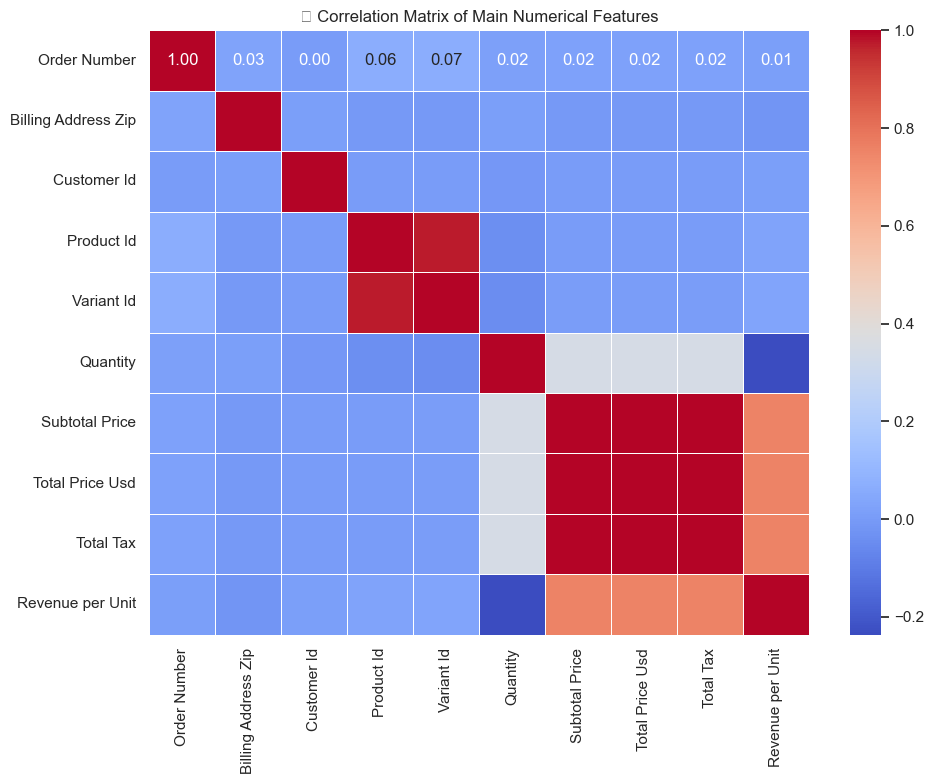

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix only for main numerical columns to avoid memory issues
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔗 Correlation Matrix of Main Numerical Features")
plt.tight_layout()
plt.show()


###  Identify Highly Correlated Features

In [152]:
# Get pairs with correlation > 0.8 (excluding perfect correlation with itself)
threshold = 0.8
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            corr_value = corr_matrix.iloc[i, j]
            high_corr_pairs.append((col1, col2, corr_value))

# Show results
for col1, col2, val in high_corr_pairs:
    print(f"🔁 {col1} and {col2} are highly correlated ({val:.2f})")


🔁 Variant Id and Product Id are highly correlated (0.98)
🔁 Total Price Usd and Subtotal Price are highly correlated (1.00)
🔁 Total Tax and Subtotal Price are highly correlated (1.00)
🔁 Total Tax and Total Price Usd are highly correlated (1.00)


###  Export Cleaned Dataset to CSV

In [ ]:
# Save as CSV
df.to_csv('Cleaned_Shopify_Sales.csv', index=False)

print("✅ Dataset successfully exported!")
